In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'E:/Final Dissertation/Final_Dataset/Final_Hourly_Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data = data[["Date","Time", "PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor", "PM2.5_µg/m³_council"]]
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('Datetime', inplace=True)
data.drop(columns=['Date', 'Time'], inplace=True)

In [4]:
data.head()

,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council
Datetime,,
2024-08-15 15:00:00,4.483333,4.8
2024-08-15 16:00:00,4.766667,3.8
2024-08-15 17:00:00,3.533333,7.1
2024-08-15 18:00:00,4.733333,6.4
2024-08-15 19:00:00,4.789474,-1.0


In [5]:
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2024-08-15 15:00:00 to 2024-08-22 19:00:00
Data columns (total 2 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor  55 non-null     float64
 1   PM2.5_µg/m³_council                                               55 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
None


#### No null or non numeric values

In [6]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council
count,55.000000,55.000000
mean,12.738731,8.789091
std,16.939382,7.651450
min,0.750000,-1.000000
25%,4.608333,4.150000
50%,7.133333,5.900000
75%,9.383333,11.100000
max,62.800000,30.000000


In [7]:
data = data[data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'] >= 0]
data = data[data['PM2.5_µg/m³_council'] >= 0]

In [8]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council
count,54.000000,54.000000
mean,12.885939,8.970370
std,17.062893,7.603143
min,0.750000,0.000000
25%,4.545833,4.300000
50%,7.191667,6.000000
75%,9.558333,11.150000
max,62.800000,30.000000


In [9]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor    0
PM2.5_µg/m³_council                                                 0
dtype: int64


## Plot the trend

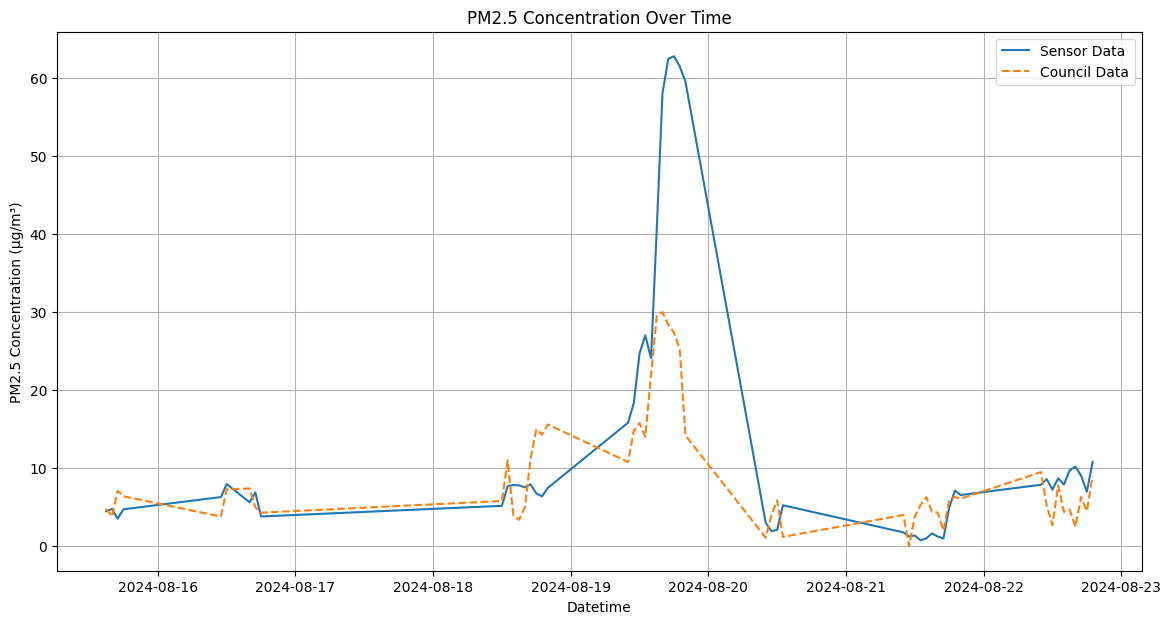

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], label='Sensor Data')
plt.plot(data.index, data['PM2.5_µg/m³_council'], label='Council Data', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

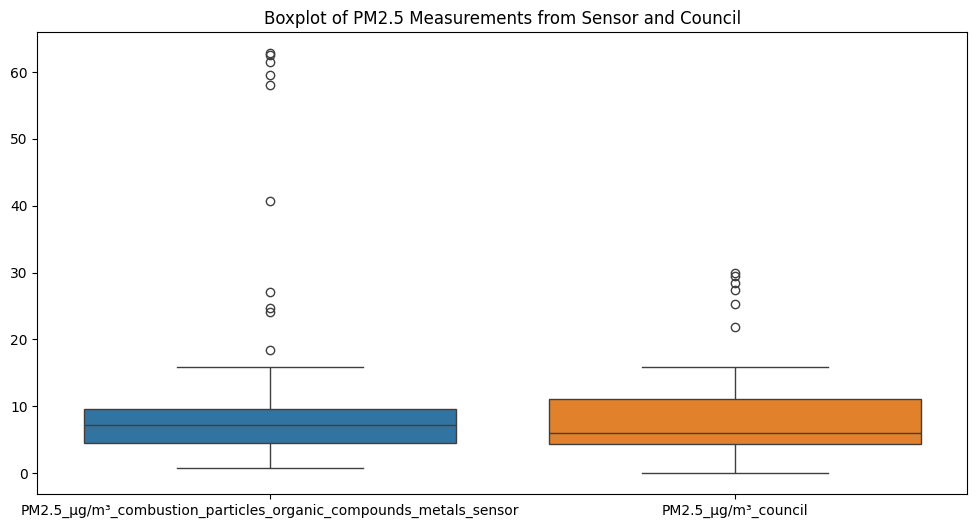

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor', 'PM2.5_µg/m³_council']])
plt.title('Boxplot of PM2.5 Measurements from Sensor and Council')
plt.show()


Correlation Matrix:


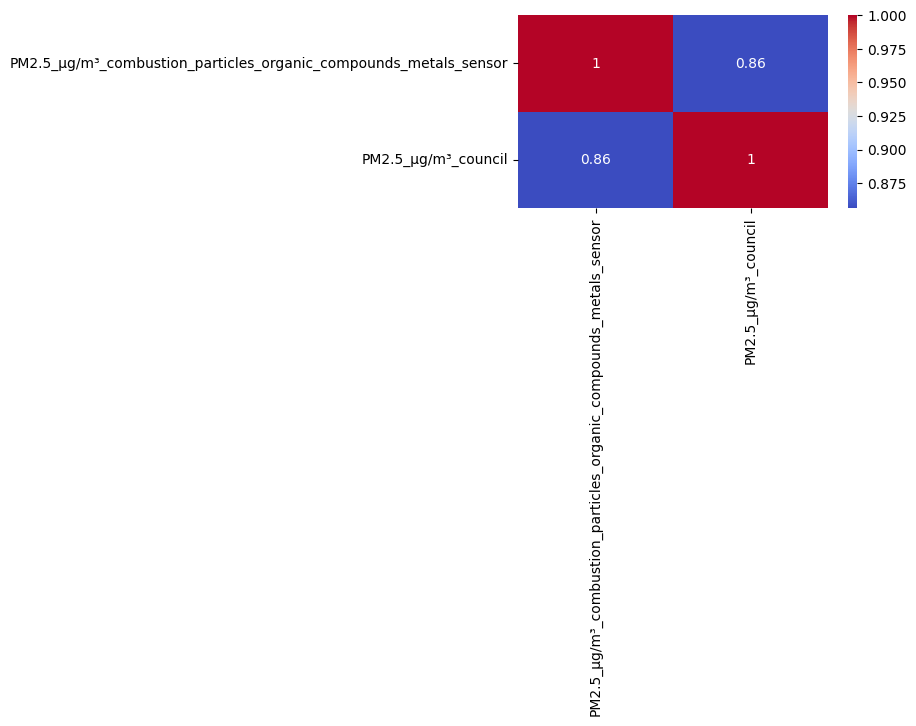

In [12]:
print("\nCorrelation Matrix:")
plt.figure(figsize=(5, 2.5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


Distribution of Target Variable PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor :


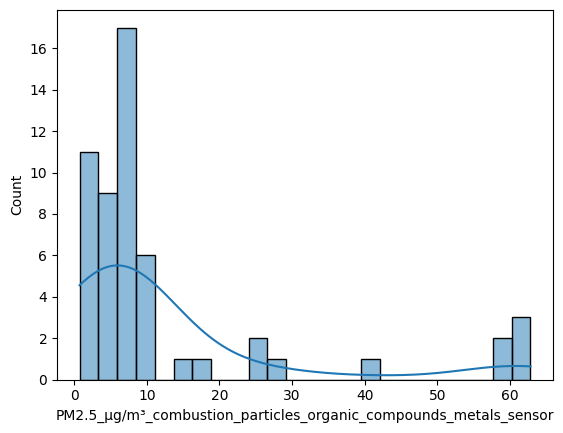

In [13]:
print("\nDistribution of Target Variable PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor :")
sns.histplot(data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], kde=True)
plt.show()


Distribution of Target Variable PM2.5_µg/m³_council:


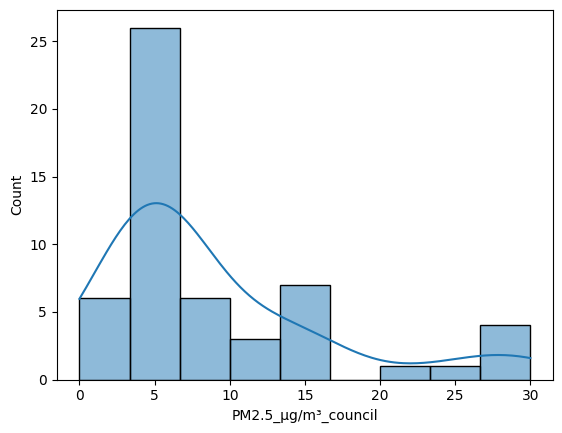

In [14]:
print("\nDistribution of Target Variable PM2.5_µg/m³_council:")
sns.histplot(data['PM2.5_µg/m³_council'], kde=True)
plt.show()


Scatter plot between features and target variable:


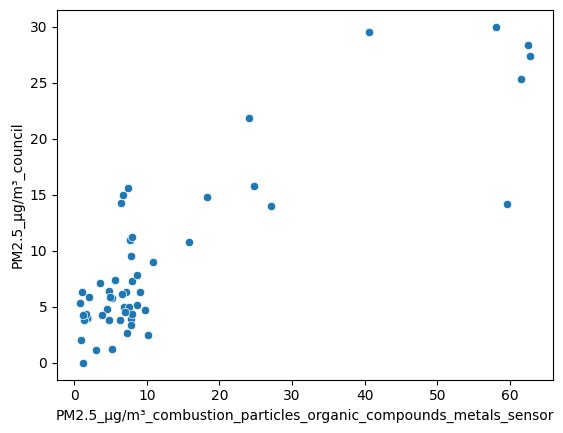

In [15]:
print("\nScatter plot between features and target variable:")
sns.scatterplot(x=data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], y=data['PM2.5_µg/m³_council'])
plt.show()

## Outlier Detection

In [16]:
data['Difference'] = abs(data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'] - data['PM2.5_µg/m³_council'])
significant_discrepancies = data[data['Difference'] > data['Difference'].mean() + 2 * data['Difference'].std()]
significant_discrepancies

,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council,Difference
Datetime,,,
2024-08-19 16:00:00,58.033333,30.0,28.033333
2024-08-19 17:00:00,62.450000,28.4,34.050000
2024-08-19 18:00:00,62.800000,27.4,35.400000
2024-08-19 19:00:00,61.516667,25.3,36.216667
2024-08-19 20:00:00,59.545455,14.2,45.345455


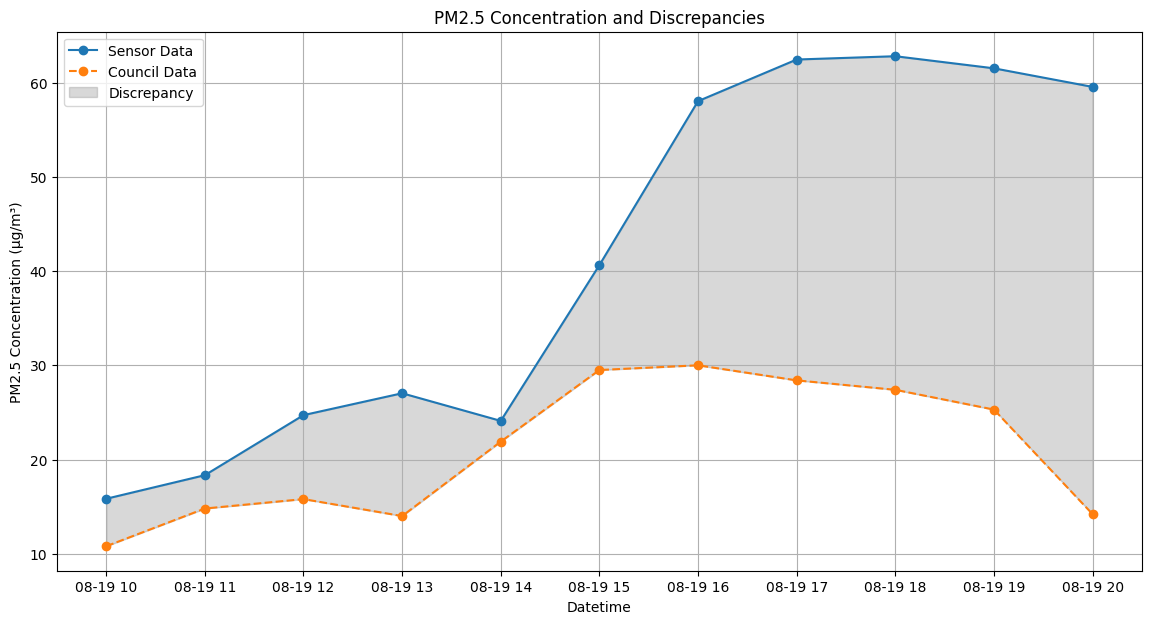

In [17]:
unique_dates = significant_discrepancies.index.date
unique_dates = np.unique(unique_dates)
for date in unique_dates:
    outlier_data = data.loc[data.index.date == date]

plt.figure(figsize=(14, 7))
plt.plot(outlier_data.index, outlier_data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], label='Sensor Data', marker = 'o')
plt.plot(outlier_data.index, outlier_data['PM2.5_µg/m³_council'], label='Council Data', linestyle='--', marker = 'o')
plt.fill_between(outlier_data.index, outlier_data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], outlier_data['PM2.5_µg/m³_council'], color='grey', alpha=0.3, label='Discrepancy')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 Concentration and Discrepancies')
plt.legend()
plt.grid(True)
plt.show()

#### Manually tested IQR from 0.5 to 1.5 and Z-score from 0.5 to 3, retaining most data points and a few outliers.

## Outlier Removal using IQR

In [18]:
Q1 = data['Difference'].quantile(0.25)
Q3 = data['Difference'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

iqr_outliers = data[(data['Difference'] < lower_bound) | (data['Difference'] > upper_bound)]
data = data[(data['Difference'] >= lower_bound) & (data['Difference'] <= upper_bound)]
print("IQR Outliers Removed:")
iqr_outliers

IQR Outliers Removed:


,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council,Difference
Datetime,,,
2024-08-18 18:00:00,6.750000,15.0,8.250000
2024-08-18 19:00:00,6.400000,14.3,7.900000
2024-08-18 20:00:00,7.470588,15.6,8.129412
2024-08-19 12:00:00,24.711538,15.8,8.911538
2024-08-19 13:00:00,27.033333,14.0,13.033333
2024-08-19 15:00:00,40.633333,29.5,11.133333
2024-08-19 16:00:00,58.033333,30.0,28.033333
2024-08-19 17:00:00,62.450000,28.4,34.050000
2024-08-19 18:00:00,62.800000,27.4,35.400000


## Outlier Removal using Z Score

In [19]:
data['Z_Score'] = (data['Difference'] - data['Difference'].mean()) / data['Difference'].std()
z_score_outliers = data[data['Z_Score'].abs() > 2]
data = data[data['Z_Score'].abs() <= 2]
print("Z-Score Outliers Removed:")
z_score_outliers

Z-Score Outliers Removed:


,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council,Difference,Z_Score
Datetime,,,,


In [20]:
data['Difference'] = abs(data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'] - data['PM2.5_µg/m³_council'])
significant_discrepancies = data[data['Difference'] > data['Difference'].mean() + 2 * data['Difference'].std()]
significant_discrepancies

,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council,Difference,Z_Score
Datetime,,,,


In [21]:
data.drop(columns=['Difference', 'Z_Score'], inplace=True)

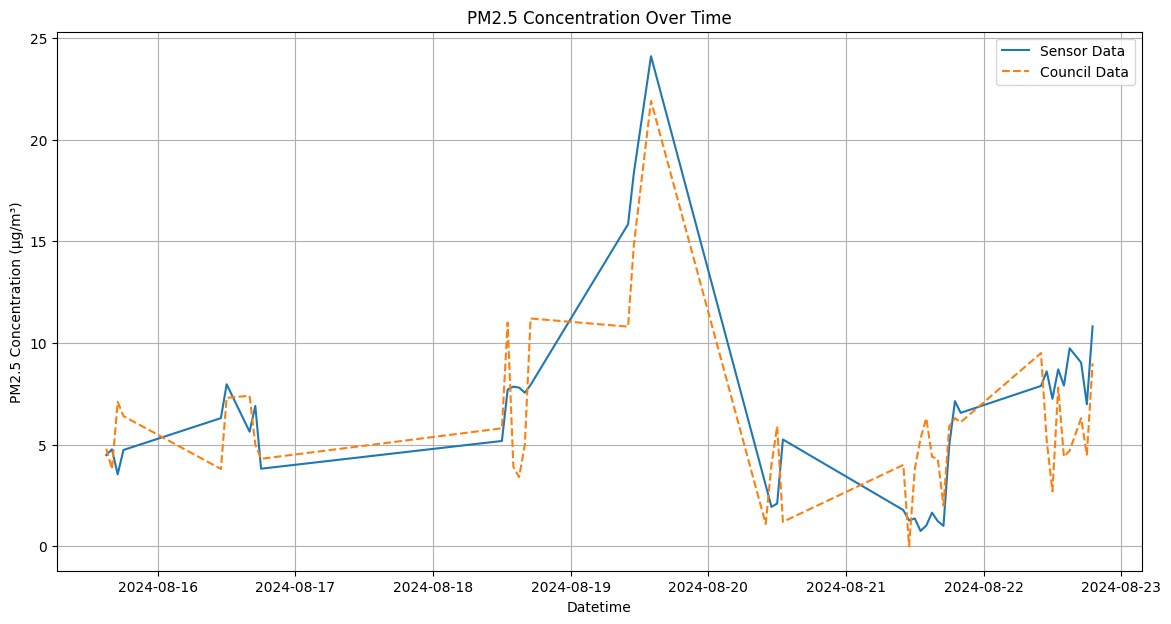

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], label='Sensor Data')
plt.plot(data.index, data['PM2.5_µg/m³_council'], label='Council Data', linestyle='--')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Check the Final distribution and Outliers

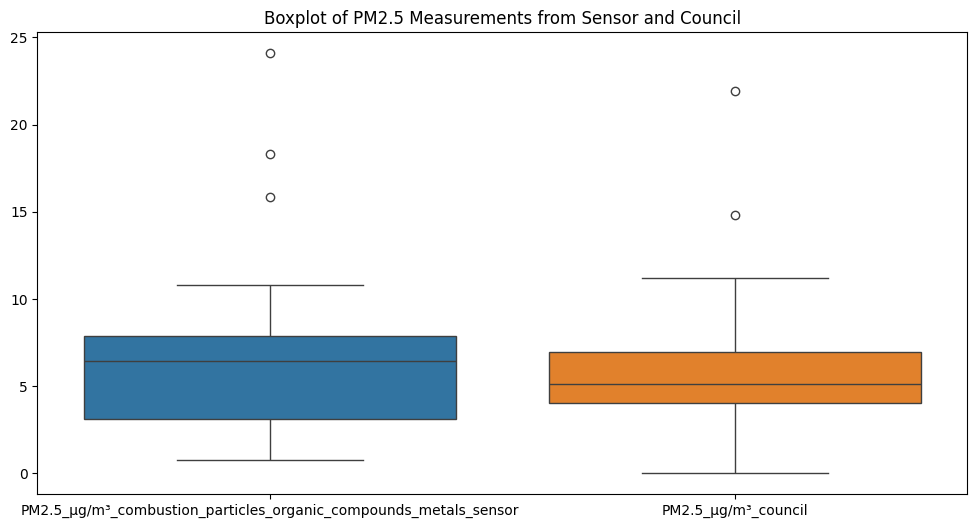

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor', 'PM2.5_µg/m³_council']])
plt.title('Boxplot of PM2.5 Measurements from Sensor and Council')
plt.show()


Correlation Matrix:


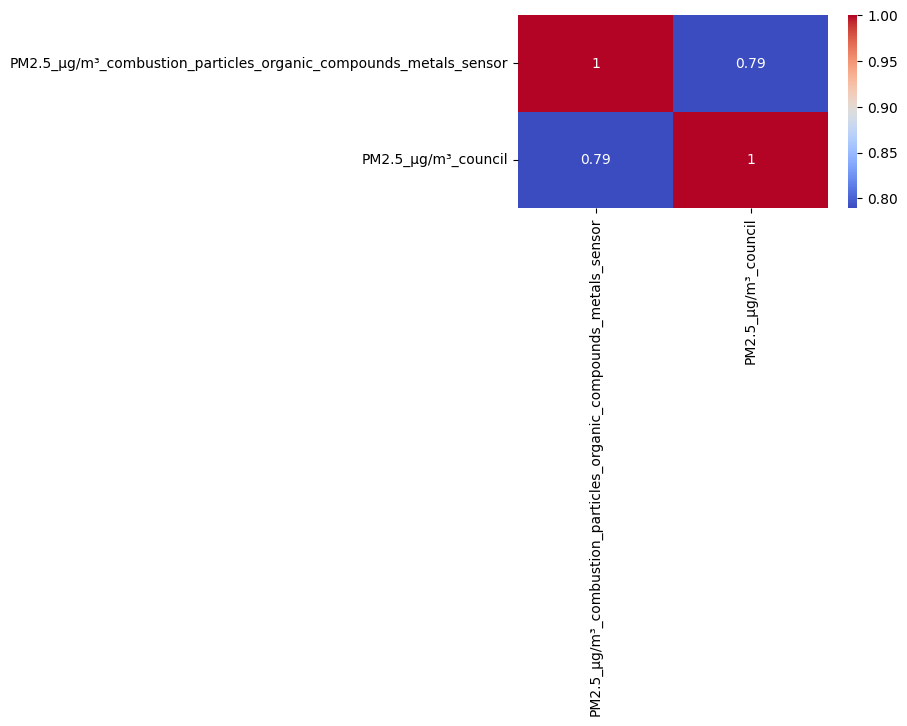

In [24]:
print("\nCorrelation Matrix:")
plt.figure(figsize=(5, 2.5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


Scatter plot between features and target variable:


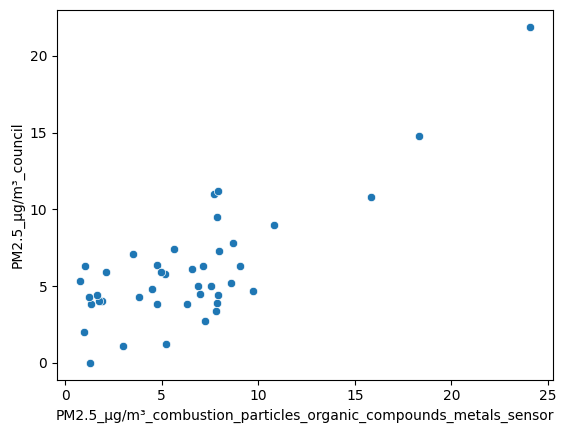

In [25]:
print("\nScatter plot between features and target variable:")
sns.scatterplot(x=data['PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor'], y=data['PM2.5_µg/m³_council'])
plt.show()

In [26]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,PM2.5_µg/m³_combustion_particles_organic_compounds_metals_sensor,PM2.5_µg/m³_council
count,42.000000,42.000000
mean,6.388011,6.009524
std,4.692107,3.819769
min,0.750000,0.000000
25%,3.133333,4.000000
50%,6.430000,5.100000
75%,7.895588,6.925000
max,24.100000,21.900000


In [27]:
data.to_csv('E:/Final Dissertation/Cleaned_Dataset/PM2.5_sensor_and_council.csv')